<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/7_Quick_note_on_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


cell_metadata = pd.read_csv("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/20200711_patchseq_metadata_mouse.csv", index_col="cell_specimen_id")
rna_data = pd.read_hdf("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/gene_counts_ppm.hdf5.lz4")

morph_data = pd.read_csv(
    "/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/morph_data.csv",
    index_col="cell_specimen_id"
)

## Correlation Matrices

Consider examining whether your feature might be correlated with others in the dataset using a **correlation matrix**.

Get all the features in `morph_data`:

In [4]:
morph_data.columns

Index(['axon.total_length', 'all_neurites.total_length',
       'basal_dendrite.total_length', 'dendrite.total_length',
       'dendrite.total_surface_area', 'axon.total_surface_area',
       'all_neurites.total_surface_area', 'basal_dendrite.total_surface_area',
       'dendrite.total_volume', 'axon.total_volume',
       'all_neurites.total_volume', 'basal_dendrite.total_volume',
       'dendrite.num_tips', 'axon.num_tips', 'all_neurites.num_tips',
       'basal_dendrite.num_tips', 'dendrite.num_nodes', 'axon.num_nodes',
       'all_neurites.num_nodes', 'basal_dendrite.num_nodes',
       'dendrite.num_branches', 'axon.num_branches',
       'all_neurites.num_branches', 'basal_dendrite.num_branches'],
      dtype='object')

Compute the correlation matrix:

In [6]:
morph_data[["dendrite.num_branches", "dendrite.total_length", "dendrite.total_volume", "axon.num_branches"]].corr()

,dendrite.num_branches,dendrite.total_length,dendrite.total_volume,axon.num_branches
dendrite.num_branches,1.000000,0.727041,0.502686,-0.122218
dendrite.total_length,0.727041,1.000000,0.764869,-0.169674
dendrite.total_volume,0.502686,0.764869,1.000000,-0.125733
axon.num_branches,-0.122218,-0.169674,-0.125733,1.000000


We can also display this information as a heatmap:

<Axes: >

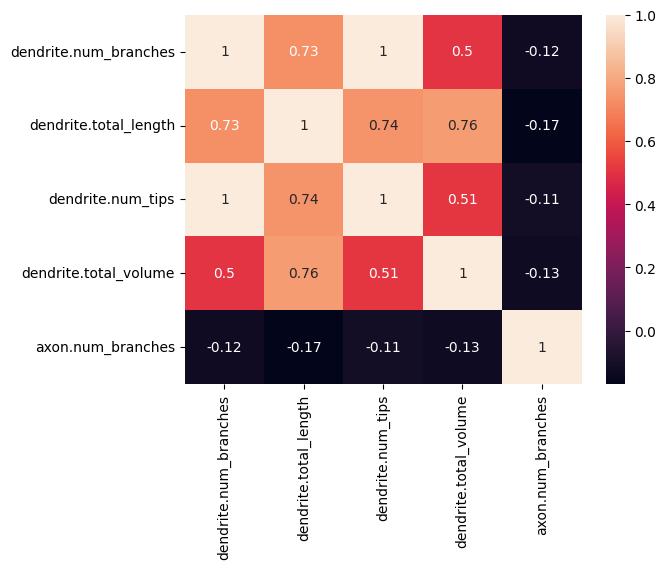

In [13]:
sns.heatmap(morph_data[["dendrite.num_branches", "dendrite.total_length", "dendrite.num_tips", "dendrite.total_volume", "axon.num_branches"]].corr(), annot=True)

We can see, for example, that dendrite branches and total length have a strong linear relationship, whereas number of branches and number of tips have $r = 1$, suggesting that there may not be a meaningful distinction at all between the features. We can more closely examine this with scatterplots:

<Axes: xlabel='dendrite.num_branches', ylabel='dendrite.total_length'>

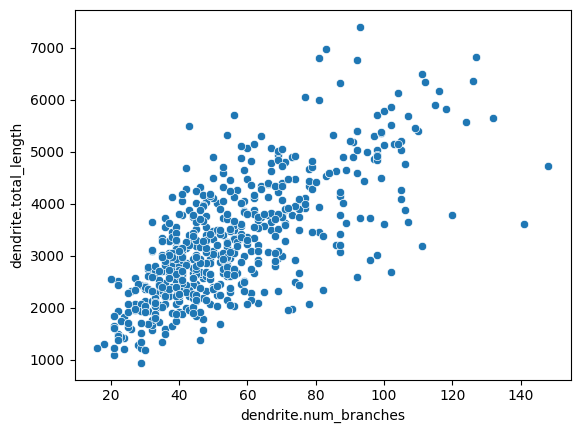

In [15]:
sns.scatterplot(x=morph_data['dendrite.num_branches'], y=morph_data['dendrite.total_length'])

<Axes: xlabel='dendrite.num_branches', ylabel='dendrite.num_tips'>

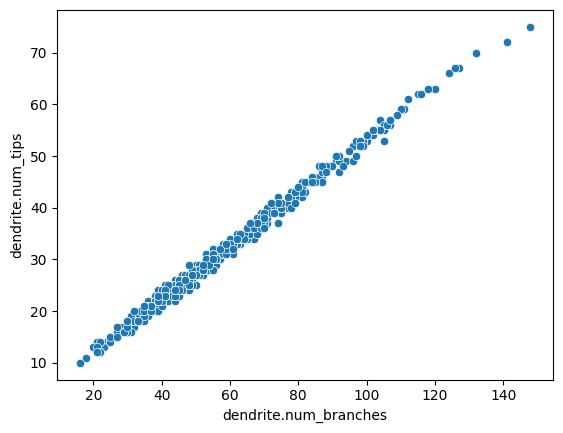

In [16]:
sns.scatterplot(x=morph_data['dendrite.num_branches'], y=morph_data['dendrite.num_tips'])